<a href="https://colab.research.google.com/github/aakinw/solar_system_mock/blob/main/UMD_PlanetTerp_Professor_Rating_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Part 1: Get Professor Review Data

In [ ]:
#Import depndencies
import pandas as pd
import requests
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

#Gets reviews for a specific professor
def get_professor_reviews(prof_name):
    url = f"https://planetterp.com/api/v1/professor?name={prof_name.replace(' ', '%20')}&reviews=true"
    response = requests.get(url)
    response.raise_for_status()
    return response.json()

professor_name = "Elias Gonzalez"
prof_data = get_professor_reviews(professor_name)
reviews = prof_data['reviews']


df = pd.DataFrame(reviews)
print(df)


         professor    course  \
0   Elias Gonzalez  CMSC389N   
1   Elias Gonzalez  CMSC389N   
2   Elias Gonzalez   CMSC125   
3   Elias Gonzalez   CMSC320   
4   Elias Gonzalez   CMSC131   
..             ...       ...   
78  Elias Gonzalez   CMSC131   
79  Elias Gonzalez   CMSC131   
80  Elias Gonzalez      None   
81  Elias Gonzalez   CMSC131   
82  Elias Gonzalez   CMSC131   

                                               review  rating expected_grade  \
0   Good professor. Class is ridiculously easy tho...       5              A   
1   I had Professor Gonzalez for CMSC389N and he w...       5             A+   
2   If you have the opportunity to take a class wi...       5              A   
3   Did a good job with the course although the co...       5             A-   
4   Elias is a solid teacher, the lectures are not...       5              A   
..                                                ...     ...            ...   
78  I did not take Java courses in high school, so...  

Part 2: Data Cleaning

In [ ]:
data = []

grade_mapping = {
    'A+': 4.0, 'A': 4.0, 'A-': 3.7,
    'B+': 3.3, 'B': 3.0, 'B-': 2.7,
    'C+': 2.3, 'C': 2.0, 'C-': 1.7,
    'D+': 1.3, 'D': 1.0, 'D-': 0.7,
    'F': 0.0
}

for r in reviews:
    rev_text = r.get('review', "")
    grade_expected = r.get('expected_grade')
    grade_nums = grade_mapping.get(grade_expected, None)
    rating = r.get('rating', None)
    created = r.get('created')

    if rev_text and rating is not None:
        sentiment = TextBlob(rev_text).sentiment.polarity
        rev_length = len(rev_text)
        semester_year = int(created[:4]) if created else None

        data.append({
            'sentiment': sentiment,
            'expected_grade_num': grade_nums,
            'review_length': rev_length,
            'semester_year': semester_year,
            'rating': rating
        })

df = pd.DataFrame(data)
print(df)
df = df.dropna()

    sentiment  expected_grade_num  review_length  semester_year  rating
0    0.566667                 4.0             50           2020       5
1    0.007830                 4.0            298           2021       5
2    0.177279                 4.0           1380           2022       5
3   -0.100000                 3.7            128           2022       5
4    0.060417                 4.0            412           2022       5
..        ...                 ...            ...            ...     ...
78   0.098825                 3.0           1779           2024       3
79   0.182222                 4.0            549           2025       5
80   0.146667                 4.0            397           2025       5
81   0.310000                 4.0            196           2025       5
82   0.144196                 4.0            511           2025       5

[83 rows x 5 columns]


Part 3: Linear Regression Model

In [ ]:
X = df[['sentiment', 'expected_grade_num', 'review_length', 'semester_year']]
y = df['rating']

#Train split and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

#Showcasing results
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression:")
print(f"  MSE: {mse_lr:.4f}")
print(f"  R²: {r2_lr:.4f}")
print("-" * 40)

Linear Regression:
  MSE: 0.3202
  R²: -1.1021
----------------------------------------


Part 4: Decision Tree & Random Forest Models

In [ ]:
#Train split and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Training DecisionTree and Random Forest models
dt_model = DecisionTreeRegressor(random_state=42)
rf_model = RandomForestRegressor(random_state=42)

dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

models_tree = {'Decision Tree': dt_model, 'Random Forest': rf_model}

#Showing results
for name, model in models_tree.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name}:")
    print(f"  MSE: {mse:.4f}")
    print(f"  R²: {r2:.4f}")
    print("-" * 40)

Decision Tree:
  MSE: 0.6250
  R²: -3.1026
----------------------------------------
Random Forest:
  MSE: 0.3676
  R²: -1.4126
----------------------------------------


Part 5: Feature Importance


Linear Regression Coefficients / Feature Importance:
              Feature  Coefficient
0           sentiment     1.225859
1  expected_grade_num     0.487482
2       review_length    -0.000440
3       semester_year    -0.242055


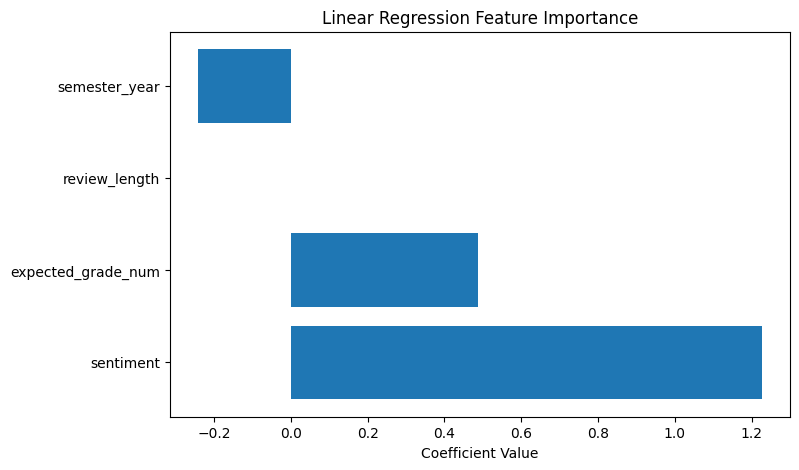


Decision Tree Feature Importance:
              Feature  Importance
0           sentiment    0.284364
1  expected_grade_num    0.085373
2       review_length    0.545522
3       semester_year    0.084741


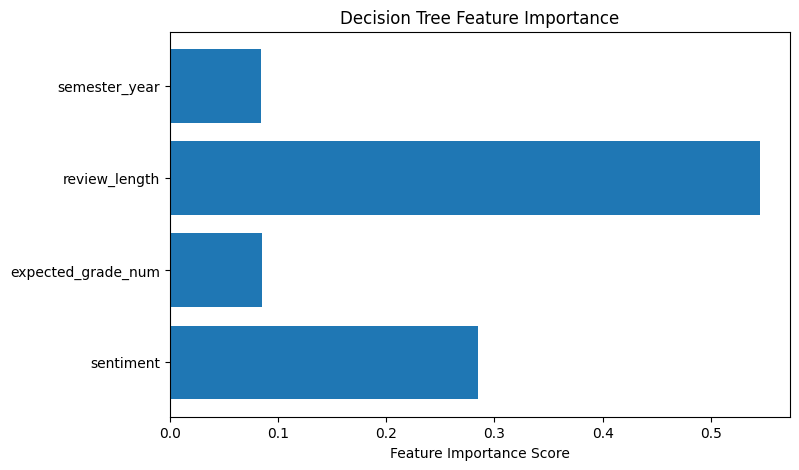


Random Forest Feature Importance:
              Feature  Importance
0           sentiment    0.328318
1  expected_grade_num    0.107463
2       review_length    0.475841
3       semester_year    0.088379


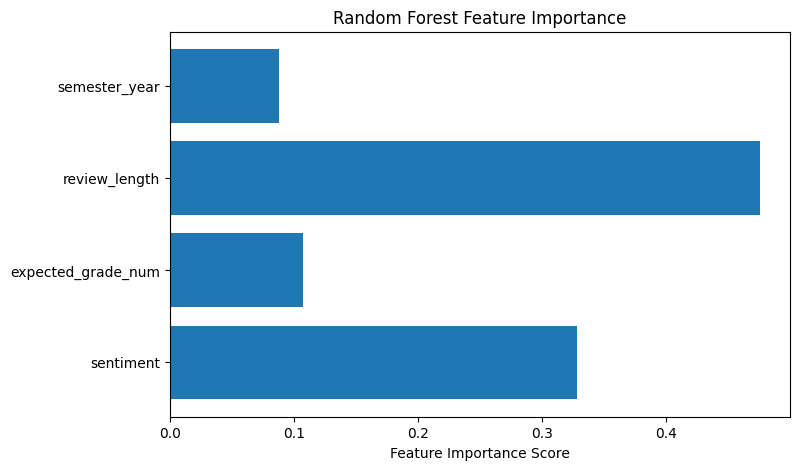

In [ ]:
feature_names = ['sentiment', 'expected_grade_num', 'review_length', 'semester_year']


#Linear Regression Feature Importance Calculation
coefs = lr_model.coef_
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefs
})

print("\nLinear Regression Coefficients / Feature Importance:")
print(coef_df)

plt.figure(figsize=(8,5))
plt.barh(coef_df['Feature'], coef_df['Coefficient'])
plt.xlabel('Coefficient Value')
plt.title('Linear Regression Feature Importance')
plt.show()

#Decision Tree Feature Importance Calculation
importances_dt = dt_model.feature_importances_

dt_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances_dt
})

print("\nDecision Tree Feature Importance:")
print(dt_importance_df)

plt.figure(figsize=(8,5))
plt.barh(dt_importance_df['Feature'], dt_importance_df['Importance'])
plt.xlabel('Feature Importance Score')
plt.title('Decision Tree Feature Importance')
plt.show()

#Random Forest Feature Importance Calculation
importances_rf = rf_model.feature_importances_

rf_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances_rf
})

print("\nRandom Forest Feature Importance:")
print(rf_importance_df)

plt.figure(figsize=(8,5))
plt.barh(rf_importance_df['Feature'], rf_importance_df['Importance'])
plt.xlabel('Feature Importance Score')
plt.title('Random Forest Feature Importance')
plt.show()

Part 6: Comparing Models

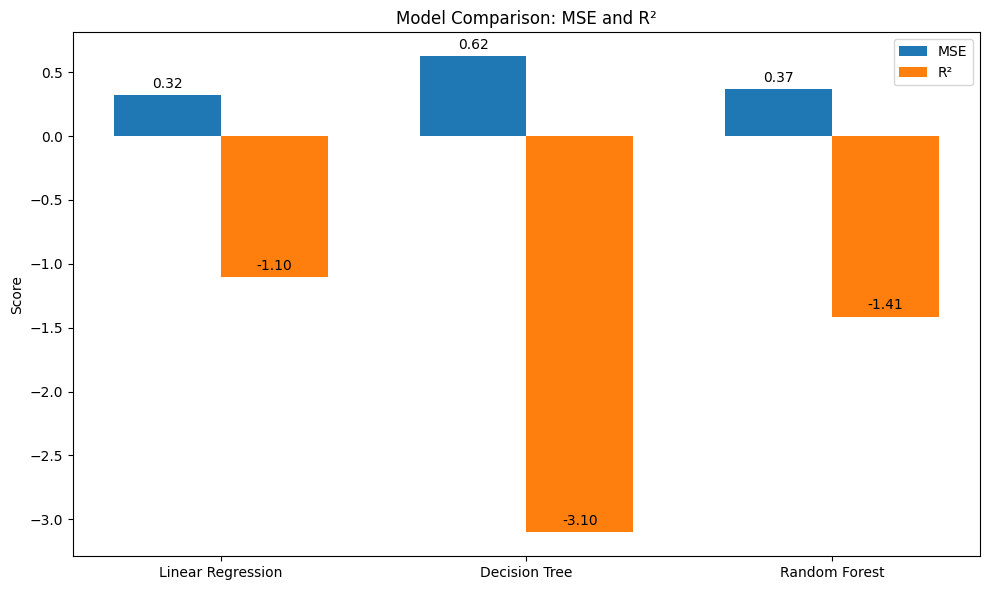

In [ ]:

mse_scores = {
    'Linear Regression': 0.3202,
    'Decision Tree': 0.6250,
    'Random Forest': 0.3676
}

r2_scores = {
    'Linear Regression': -1.1021,
    'Decision Tree': -3.1026,
    'Random Forest': -1.4126
}

models = list(mse_scores.keys())
mse_values = list(mse_scores.values())
r2_values = list(r2_scores.values())

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, mse_values, width, label='MSE')
bars2 = ax.bar(x + width/2, r2_values, width, label='R²')

ax.set_ylabel('Score')
ax.set_title('Model Comparison: MSE and R²')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bars1)
autolabel(bars2)

plt.tight_layout()
plt.show()
